# Preprocesamiento con CountVectorizer
El CountVectorizer convierte una colección de documentos de texto a una matriz de recuento de tokens.

## Tokenización y representación sin otro tipo de preprocesamiento

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']

#Inicializamos y aplicamos el CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
features  = vectorizer.get_feature_names()

# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())
print(X)

# Convertimos a un DataFrame (no recomendable)
import pandas as pd
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names()
df

['and', 'document', 'documented', 'fictitious', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 0 1 1 1 0 0 1 0 1]
 [0 2 1 0 0 1 0 1 1 0 1]
 [1 0 0 0 0 1 1 0 1 1 1]
 [0 1 0 0 1 1 0 0 1 0 1]]
  (0, 10)	1
  (0, 5)	1
  (0, 8)	1
  (0, 4)	1
  (0, 3)	1
  (0, 1)	1
  (1, 10)	1
  (1, 5)	1
  (1, 8)	1
  (1, 1)	2
  (1, 7)	1
  (1, 2)	1
  (2, 10)	1
  (2, 5)	1
  (2, 8)	1
  (2, 0)	1
  (2, 9)	1
  (2, 6)	1
  (3, 10)	1
  (3, 5)	1
  (3, 8)	1
  (3, 4)	1
  (3, 1)	1


,and,document,documented,fictitious,first,is,one,second,the,third,this
0,0,1,0,1,1,1,0,0,1,0,1
1,0,2,1,0,0,1,0,1,1,0,1
2,1,0,0,0,0,1,1,0,1,1,1
3,0,1,0,0,1,1,0,0,1,0,1


**Visualización de la frecuencia de los tokens**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5f68a290>,
                    color=None,
                    features=['and', 'document', 'documented', 'fictitious',
                              'first', 'is', 'one', 'second', 'the', 'third',
                              'this'],
                    n=None, orient='h')

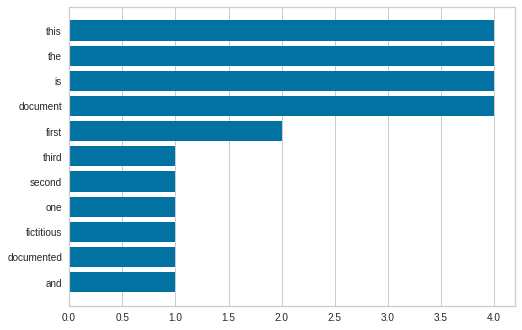

In [ ]:
from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)

## Tokenización con remoción de stopwords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']

#Inicializamos y aplicamos el CountVectorizer
vectorizer = CountVectorizer(stop_words="english") # Tambien es posible pasar una lista propia ["is","the"]
print(vectorizer.get_stop_words())

X = vectorizer.fit_transform(corpus)
features  = vectorizer.get_feature_names()


# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())

frozenset({'further', 'yourself', 'will', 'over', 'yet', 'top', 'meanwhile', 'namely', 'neither', 'another', 'thence', 'being', 'less', 'whereafter', 'due', 'find', 'two', 'almost', 'any', 'give', 'even', 'latterly', 'from', 'ourselves', 'has', 'he', 'thick', 'alone', 'that', 'four', 'part', 'during', 'via', 'once', 'keep', 'however', 'can', 'nowhere', 'whole', 'each', 'cannot', 'fill', 'becomes', 'first', 'toward', 'together', 'itself', 'though', 'something', 'nothing', 'go', 'these', 'ours', 'while', 'system', 'thin', 'back', 'under', 'not', 'interest', 'might', 'noone', 'what', 'wherever', 'hereafter', 'for', 'nevertheless', 'call', 'thru', 'and', 'done', 'thereafter', 'empty', 'many', 'seemed', 'put', 'is', 'mill', 'those', 'perhaps', 'never', 'had', 'whenever', 'also', 'own', 'anyhow', 'whoever', 'fifty', 'yours', 'was', 'get', 'if', 'where', 'i', 'hers', 'at', 'until', 'a', 'amoungst', 'on', 'you', 'except', 'amongst', 'an', 'eleven', 'made', 'such', 'front', 'besides', 'five', '

**Visualización de la frecuencia de los tokens**

In [ ]:
from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)
visualizer.poof()


## Tokenización con remoción de stopwords agregando stopwords adicionales a los provistos por SciKit Learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']


# Agregamos stopwords a la lista predefinida en Scikit Learn 
stop_words = text.ENGLISH_STOP_WORDS.union(['second'])

#Inicializamos y aplicamos el CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words)

print(vectorizer.get_stop_words())

X = vectorizer.fit_transform(corpus)
features  = vectorizer.get_feature_names()


# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())

frozenset({'ltd', 'further', 'yourself', 'themselves', 'will', 'over', 'three', 'yet', 'top', 'beforehand', 'meanwhile', 'every', 'namely', 'neither', 'cant', 'have', 'another', 'around', 'found', 'few', 'thence', 'still', 'being', 'less', 'whereafter', 'would', 'due', 'find', 'two', 'eg', 'no', 'almost', 'any', 'whence', 'do', 'give', 'even', 'latterly', 'from', 'ourselves', 'she', 'but', 'has', 'his', 'he', 'someone', 'thick', 'alone', 'fire', 'that', 'four', 'part', 'others', 'during', 'via', 'once', 'keep', 'full', 'show', 'however', 'whom', 'can', 'none', 'nowhere', 'other', 'whole', 'them', 'each', 'nor', 'cannot', 'fill', 'are', 'whither', 'becomes', 'first', 'describe', 'toward', 'together', 'against', 'itself', 'between', 'take', 'ten', 'behind', 'though', 'something', 'hereby', 'therein', 'nothing', 'third', 'seems', 'go', 'see', 'these', 'ours', 'anyone', 'while', 'then', 'system', 'whereupon', 'towards', 'everywhere', 'ie', 'thin', 'wherein', 'sixty', 'everything', 'back', 

**Visualización de la frecuencia de los tokens**

In [ ]:
from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)

## Tokenización con remoción de stopwords y n-grams



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']

#Inicializamos y aplicamos el CountVectorizer
vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3))
X = vectorizer.fit_transform(corpus)
features  = vectorizer.get_feature_names()


# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())

['document', 'document documented', 'document second', 'document second document', 'documented', 'fictitious', 'fictitious document', 'second', 'second document', 'second document documented']
[[1 0 0 0 0 1 1 0 0 0]
 [2 1 1 1 1 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [ ]:
from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)

## Tokenización con remoción de stopwords + stemming con NLTK

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']
# Creamos el stemmer
stemmer = PorterStemmer()
# Construimos un analyzer con el preprocesamiento que si provee CountVectorizer
analyzer = CountVectorizer(stop_words='english').build_analyzer()

# Definimos una función que suma el stemming al preprocesamiento que provee el analyzer
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

#Inicializamos y aplicamos el CountVectorizer utilizando la función como analyzer
vectorizer = CountVectorizer(analyzer=stemmed_words, ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
features  = vectorizer.get_feature_names()


# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())

['document', 'fictiti', 'second']
[[1 1 0]
 [3 0 1]
 [0 0 0]
 [1 0 0]]


In [ ]:
from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)

##Tokenización con remoción de stopwords y n-grams + stemming con NLTK

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']

# Creamos el stemmer
stemmer = PorterStemmer()

# Construimos un TOKENIZER con la tokenización que provee CountVectorizer
tokenizer = CountVectorizer().build_tokenizer()

# Obtenemos las stopwords que provee SciKit Learn
stop_words = text.ENGLISH_STOP_WORDS

# Definimos una función que aplica el stemming luego de tokenizar y remover stopwords
def stem_tokenizer(doc):
    # Aplica la tokenización
    tokens = tokenizer(doc)
    # Retorna la lista de tokens luego de aplicar stemming si no es un stopword
    return list(stemmer.stem(w) for w in tokens if w not in stop_words)

#Inicializamos y aplicamos el CountVectorizer utilizando la función como analyzer
vectorizer = CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)

# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())


['document', 'document document', 'document second', 'fictiti', 'fictiti document', 'second', 'second document']
[[1 0 0 1 1 0 0]
 [3 1 1 0 0 1 1]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


##Tokenización con remoción de stopwords y n-grams + stemming con NLTK y control de frecuencia mínima

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document on Artificial Intelligence.', 
          'This document is the second Document documented.', 
          'And this is the third one. The title is Artificial Intelligence, a modern approach.',
          'Is this the first document?']

# Creamos el stemmer
stemmer = PorterStemmer()

# Construimos un TOKENIZER con la tokenización que provee CountVectorizer
tokenizer = CountVectorizer().build_tokenizer()

# Obtenemos las stopwords que provee SciKit Learn
stop_words = text.ENGLISH_STOP_WORDS

# Definimos una función que aplica el stemming luego de tokenizar y remover stopwords
def  stem_tokenizer(doc):
    # Aplica la tokenización
    tokens = tokenizer(doc)
    # Retorna la lista de tokens luego de aplicar stemming si no es un stopword
    return list(stemmer.stem(w) for w in tokens if w not in stop_words)

#Inicializamos y aplicamos el CountVectorizer utilizando la función como analyzer
vectorizer = CountVectorizer(tokenizer=stem_tokenizer, ngram_range=(1,2), min_df=2) # puede usarse también un porcentaje .5
X = vectorizer.fit_transform(corpus)

# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())


['artifici', 'artifici intellig', 'document', 'intellig']
[[1 1 1 1]
 [0 0 3 0]
 [1 1 0 1]
 [0 0 1 0]]


##TF-IDF transformer sobre resultado de la tokenización
Transforma una matriz de recuento de tokens a una representación normalizada TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Aplicamos Tf-Idf sobre la matrix de tokens
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.toarray()

array([[0.52303503, 0.52303503, 0.42344193, 0.52303503],
       [0.        , 0.        , 1.        , 0.        ],
       [0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.        , 0.        , 1.        , 0.        ]])

##Ejemplo en español

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['Este es el primer documento ficticio.', 
          'Este es el segundo documento que documenté. ¿Hay un documentador que documente?', 
          'Y este es el tercero mío. Tengo un método, muy metódico.',
          'Es este el primer documento?']

# Creamos el stemmer para español
stemmer = SnowballStemmer('spanish')

# Obtenemos stopwords para español
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')
print(stop_words)

# Construimos un TOKENIZER con la tokenización que provee CountVectorizer
tokenizer = CountVectorizer().build_tokenizer()

# Definimos una función que aplica el stemming luego de tokenizar y remover stopwords
def  stem_tokenizer(doc):
    # Aplica la tokenización
    tokens = tokenizer(doc)
    # Retorna la lista de tokens luego de aplicar stemming si no es un stopword
    return list(stemmer.stem(w) for w in tokens if w not in stop_words)

#Inicializamos y aplicamos el CountVectorizer utilizando la función como analyzer
vectorizer = CountVectorizer(tokenizer=stem_tokenizer, ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
features  = vectorizer.get_feature_names()


# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro'

In [ ]:
from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)

# Preprocesamiento con TfidfVectorizer
El TfidfVectorizer convierte una colección de documentos a una matriz TF-IDF.
Es equivalente a aplicar CountVectorizer seguido de TfidfTransformer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

# Creamos el conjunto de documentos que queremos analizar
corpus = ['This is the first fictitious document.', 
          'This document is the second Document documented.', 
          'And this is the third one.',
          'Is this the first document?']
# Creamos el stemmer
stemmer = PorterStemmer()
# Construimos un analyzer con el preprocesamiento que si provee CountVectorizer
analyzer = TfidfVectorizer(stop_words='english').build_analyzer()

# Definimos una función que suma el stemming al preprocesamiento que provee el analyzer
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

#Inicializamos y aplicamos el CountVectorizer utilizando la función como analyzer
vectorizer = TfidfVectorizer(analyzer=stemmed_words)
X = vectorizer.fit_transform(corpus)

# Mostramos los resultados
print(vectorizer.get_feature_names())
print(X.toarray())

['document', 'fictiti', 'second']
[[0.53802897 0.84292635 0.        ]
 [0.88640595 0.         0.46290873]
 [0.         0.         0.        ]
 [1.         0.         0.        ]]
